In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

In [274]:
raw_data = pd.read_csv("Fish.csv")
raw_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.00,23.20,25.40,30.00,11.52,4.02
1,Bream,290.00,24.00,26.30,31.20,12.48,4.31
2,Bream,340.00,23.90,26.50,31.10,12.38,4.70
3,Bream,363.00,26.30,29.00,33.50,12.73,4.46
4,Bream,430.00,26.50,29.00,34.00,12.44,5.13
5,Bream,450.00,26.80,29.70,34.70,13.60,4.93
6,Bream,500.00,26.80,29.70,34.50,14.18,5.28
7,Bream,390.00,27.60,30.00,35.00,12.67,4.69
8,Bream,450.00,27.60,30.00,35.10,14.00,4.84
9,Bream,500.00,28.50,30.70,36.20,14.23,4.96


In [275]:
list(set(raw_data.Species))
list(raw_data['Species'].unique())

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

In [276]:
raw_data['Species'] = raw_data['Species'].map({'Bream': 0, 'Roach': 1,'Whitefish':2,'Parkki':3,'Perch':4,'Pike':5,'Smelt':6})
raw_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.00,23.20,25.40,30.00,11.52,4.02
1,0,290.00,24.00,26.30,31.20,12.48,4.31
2,0,340.00,23.90,26.50,31.10,12.38,4.70
3,0,363.00,26.30,29.00,33.50,12.73,4.46
4,0,430.00,26.50,29.00,34.00,12.44,5.13
5,0,450.00,26.80,29.70,34.70,13.60,4.93
6,0,500.00,26.80,29.70,34.50,14.18,5.28
7,0,390.00,27.60,30.00,35.00,12.67,4.69
8,0,450.00,27.60,30.00,35.10,14.00,4.84
9,0,500.00,28.50,30.70,36.20,14.23,4.96


<AxesSubplot:xlabel='Length1'>

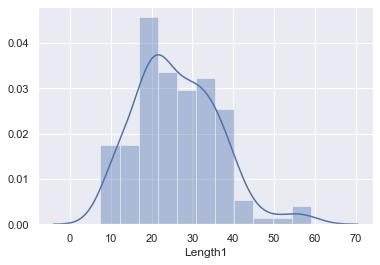

In [277]:
sns.distplot(raw_data["Length1"])

<AxesSubplot:xlabel='Length1'>

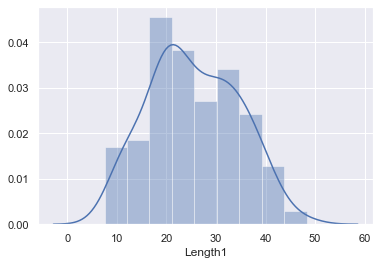

In [278]:
q = raw_data['Length1'].quantile(0.975)
data_1 = raw_data[ raw_data['Length1']<q]
sns.distplot(data_1["Length1"])

<AxesSubplot:xlabel='Length2'>

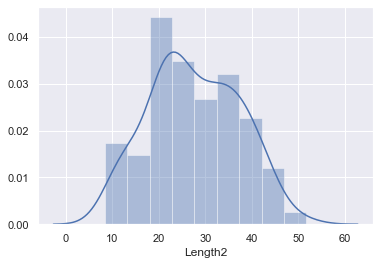

In [279]:
sns.distplot(data_1["Length2"])

<AxesSubplot:xlabel='Length2'>

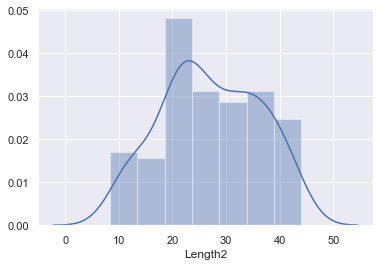

In [280]:
q = data_1['Length2'].quantile(0.975)
data_2 = data_1[data_1['Length2']<q]
sns.distplot(data_2["Length2"])

<AxesSubplot:xlabel='Length3'>

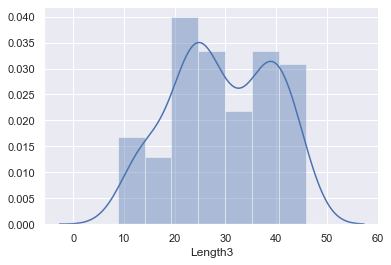

In [281]:
q = data_2['Length3'].quantile(0.975)
data_3 = data_2[data_2['Length3']<q]
sns.distplot(data_3["Length3"])

<AxesSubplot:xlabel='Height'>

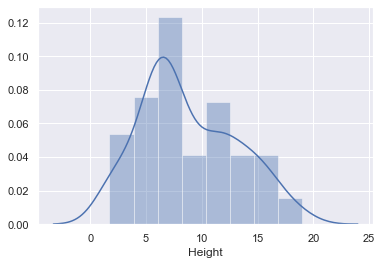

In [282]:
sns.distplot(data_3["Height"])

<AxesSubplot:xlabel='Height'>

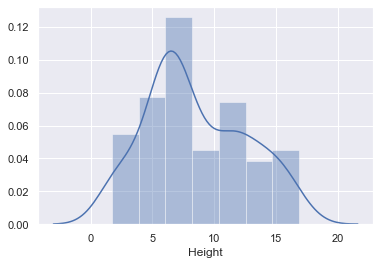

In [283]:
q = data_3['Height'].quantile(0.975)
data_4 = data_3[data_3['Height']<q]
sns.distplot(data_4["Height"])

<AxesSubplot:xlabel='Weight'>

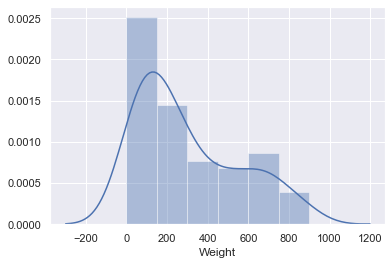

In [284]:
q = data_4['Weight'].quantile(0.975)
data_5 = data_4[data_4['Weight']<q]
sns.distplot(data_5["Weight"])

<AxesSubplot:xlabel='Width'>

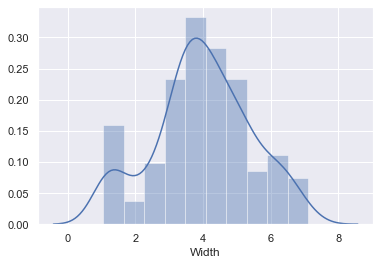

In [285]:
q = data_5['Width'].quantile(0.975)
data_6 = data_5[data_5['Width']<q]
sns.distplot(data_6["Width"])

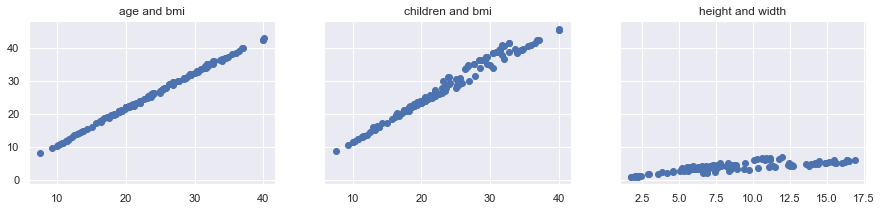

In [302]:
f, (ax1, ax2, ax3,) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'G3' as y
ax1.scatter(data_6['Length1'],data_6['Length2'])
ax1.set_title('age and bmi')
ax2.scatter(data_6['Length1'],data_6['Length3'])
ax2.set_title('children and bmi')
ax3.scatter(data_6['Height'],data_6['Width'])
ax3.set_title('height and width')
plt.show()

In [287]:
targets = data_6['Weight']
inputs = inputs = data_6.drop(['Weight'],axis=1)

In [288]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [289]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[-1.38633116e+00, -3.04630804e-02, -3.64816206e-04,
         2.09757788e-01,  8.01412397e-01,  2.39886064e-02],
       [-1.38633116e+00,  7.48802171e-02,  1.09627270e-01,
         3.40338711e-01,  1.03933982e+00,  2.24109274e-01],
       [-1.38633116e+00,  6.17123049e-02,  1.34069956e-01,
         3.29456968e-01,  1.01401046e+00,  4.97733647e-01],
       [-1.38633116e+00,  3.77742197e-01,  4.39603528e-01,
         5.90618813e-01,  1.10130009e+00,  3.29144597e-01],
       [-1.38633116e+00,  4.04078022e-01,  4.39603528e-01,
         6.45027531e-01,  1.03041754e+00,  8.04571323e-01],
       [-1.38633116e+00,  4.43581758e-01,  5.25152928e-01,
         7.21199736e-01,  1.31751663e+00,  6.59806162e-01],
       [-1.38633116e+00,  4.43581758e-01,  5.25152928e-01,
         6.99436249e-01,  1.46054571e+00,  9.05822851e-01],
       [-1.38633116e+00,  5.48925056e-01,  5.61816957e-01,
         7.53844967e-01,  1.08642962e+00,  4.93459361e-01],
       [-1.38633116e+00,  5.48925056e-01,  5.618

In [290]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.1, random_state=365)

In [291]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [292]:
y_hat = reg.predict(x_train)

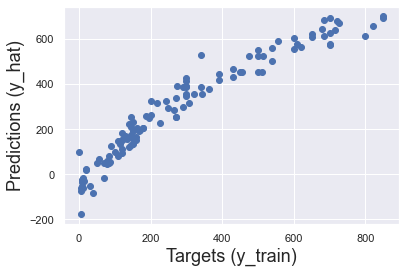

In [293]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [294]:
reg.score(x_test,y_test)

0.9495180787358268

In [295]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Species,81.30
1,Length1,593.58
2,Length2,-922.01
3,Length3,373.37
4,Height,109.64
5,Width,128.18


In [296]:
y_hat_test = reg.predict(x_test)

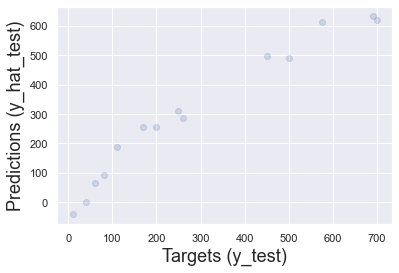

In [297]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [298]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,631.82
1,285.69
2,1.66
3,611.61
4,-40.60


In [299]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,631.82,nan
1,285.69,nan
2,1.66,nan
3,611.61,nan
4,-40.60,nan
5,92.08,nan
6,489.35,500.00
7,188.74,nan
8,254.62,450.00
9,309.60,nan


In [300]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,14.00,2.00,2.00,2.00
mean,304.61,475.00,103.01,22.77
std,232.62,35.36,130.62,29.19
min,-40.60,450.00,10.65,2.13
25%,116.25,462.50,56.83,12.45
50%,271.57,475.00,103.01,22.77
75%,496.33,487.50,149.20,33.10
max,631.82,500.00,195.38,43.42


In [301]:
pd.options.display.max_rows = 999
# Display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
6,489.35,500.00,10.65,2.13
8,254.62,450.00,195.38,43.42
0,631.82,nan,nan,nan
1,285.69,nan,nan,nan
2,1.66,nan,nan,nan
3,611.61,nan,nan,nan
4,-40.60,nan,nan,nan
5,92.08,nan,nan,nan
7,188.74,nan,nan,nan
9,309.60,nan,nan,nan
